In [33]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

import numpy as np
import imageio

Populating the interactive namespace from numpy and matplotlib


In [56]:
lightPositions = np.array([
    [ 0, -1,  1],
    [ 1,  1,  1],
    [-1,  1,  1]
])

imagePaths = [
    './2_photometricstereo/teapot_0_-1_1.png',
    './2_photometricstereo/teapot_1_1_1.png',
    './2_photometricstereo/teapot_-1_1_1.png'
]

images = map(lambda path: imageio.imread(path)[:, :, 0] / 255.0, TeapotLightImagePaths)
imageH, imageW = images[0].shape[:2]

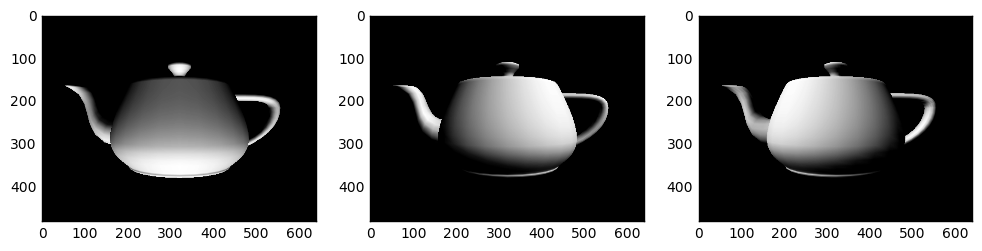

In [58]:
for i, image in enumerate(images):
    subplot(1, 3, i + 1)
    imshow(image, cmap='gray')

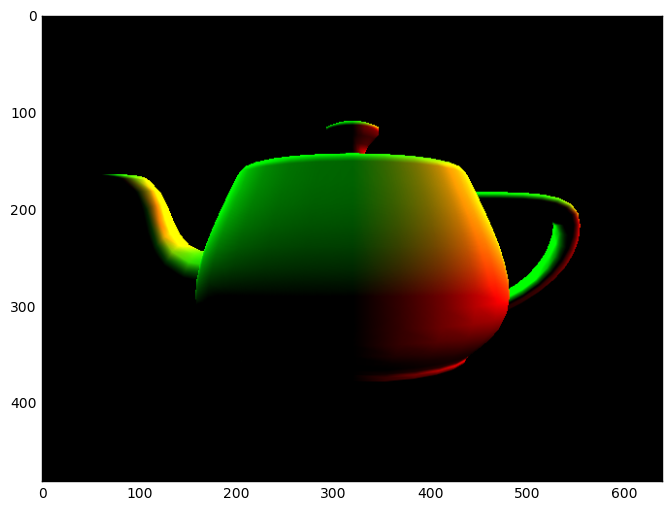

In [60]:
invertedLP = np.linalg.inv(lightPositions)

Result = np.einsum('ab,xyb->xya', invertedLP, np.dstack(images))

# Avoid zero division
UNTRUE_ZERO = 0.001
ZPoints = np.maximum(Result[:, :, 2], UNTRUE_ZERO)
Result /= ZPoints[:, :, np.newaxis]

PositiveXs = np.minimum(np.maximum(Result[:, :, 0], 0), 1)
PositiveYs = np.minimum(np.maximum(Result[:, :, 1], 0), 1)

imshow(np.dstack([PositiveXs, PositiveYs, np.zeros_like(PositiveXs)]))